In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
survey_raw_df = pd.read_csv("survey_results_public.csv") 

In [3]:
survey_raw_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [4]:
survey_raw_df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [5]:
schema_fname = pd.read_csv("survey_results_schema.csv")

In [6]:
schema_fname

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [7]:
schema_fname = schema_fname.set_index(['Column'])

In [8]:
schema_fname

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [9]:
for col in schema_fname.columns:
    print(col)

QuestionText


In [10]:
schema_fname['QuestionText']

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [11]:
schema_raw = schema_fname['QuestionText']

In [12]:
schema_raw['YearsCodePro']

'NOT including education, how many years have you coded professionally (as a part of your work)?'

In [13]:
selected_columns = [
    #demographics
    'Country', 'Age', 'Gender', 'EdLevel', 'UndergradMajor',
    #progamming experience
    'Hobbyist', 'Age1stCode', 'YearsCode', 'YearsCodePro', 'LanguageWorkedWith', 'LanguageDesireNextYear', 'NEWLearn', 'NEWStuck',
    #employment
    'Employment', 'DevType', 'WorkWeekHrs', 'JobSat', 'JobFactors', 'NEWOvertime', 'NEWEdImpt' 
]

In [14]:
len(selected_columns)

20

In [15]:
survey_df = survey_raw_df[selected_columns].copy()

In [16]:
schema = schema_raw[selected_columns]

In [17]:
survey_df

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
0,Germany,NaN,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,13,36,27,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,Once a year,Visit Stack Overflow;Go for a walk or other ph...,"Independent contractor, freelancer, or self-em...","Developer, desktop or enterprise applications;...",50.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Fairly important
1,United Kingdom,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,19,7,4,JavaScript;Swift,Python;Swift,Once a year,Visit Stack Overflow;Go for a walk or other ph...,Employed full-time,"Developer, full-stack;Developer, mobile",NaN,Very dissatisfied,NaN,NaN,Fairly important
2,Russian Federation,NaN,NaN,NaN,NaN,Yes,15,4,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,Once a decade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,25.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,18,7,4,NaN,NaN,Once a year,NaN,NaN,NaN,40.0,Slightly dissatisfied,Flex time or a flexible schedule;Office enviro...,Occasionally: 1-2 days per quarter but less th...,Not at all important/not necessary
4,United States,31.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16,15,8,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,United States,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,16,10,Less than 1 year,NaN,NaN,Once a decade,Call a coworker or friend,Employed full-time,Senior executive/VP,NaN,NaN,NaN,NaN,Very important
64457,Morocco,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
64458,Viet Nam,NaN,NaN,Primary/elementary school,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,Poland,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,HTML/CSS,HTML/CSS;Java;JavaScript,Once a year,Call a coworker or friend;Visit Stack Overflow,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
schema

Column
Country                                                  Where do you live?
Age                       What is your age (in years)? If you prefer not...
Gender                    Which of the following describe you, if any? P...
EdLevel                   Which of the following best describes the high...
UndergradMajor                        What was your primary field of study?
Hobbyist                                            Do you code as a hobby?
Age1stCode                At what age did you write your first line of c...
YearsCode                 Including any education, how many years have y...
YearsCodePro              NOT including education, how many years have y...
LanguageWorkedWith        Which programming, scripting, and markup langu...
LanguageDesireNextYear    Which programming, scripting, and markup langu...
NEWLearn                  How frequently do you learn a new language or ...
NEWStuck                  What do you do when you get stuck on a problem...
Emplo

In [19]:
survey_df.shape

(64461, 20)

In [20]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 64072 non-null  object 
 1   Age                     45446 non-null  float64
 2   Gender                  50557 non-null  object 
 3   EdLevel                 57431 non-null  object 
 4   UndergradMajor          50995 non-null  object 
 5   Hobbyist                64416 non-null  object 
 6   Age1stCode              57900 non-null  object 
 7   YearsCode               57684 non-null  object 
 8   YearsCodePro            46349 non-null  object 
 9   LanguageWorkedWith      57378 non-null  object 
 10  LanguageDesireNextYear  54113 non-null  object 
 11  NEWLearn                56156 non-null  object 
 12  NEWStuck                54983 non-null  object 
 13  Employment              63854 non-null  object 
 14  DevType                 49370 non-null

In [21]:
schema.Age1stCode

'At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)'

In [22]:
survey_df.Age1stCode.unique()

array(['13', '19', '15', '18', '16', '14', '12', '20', '42', '8', '25',
       '22', '30', '17', '21', '10', '46', '9', '7', '11', '6', nan, '31',
       '29', '5', 'Younger than 5 years', '28', '38', '23', '27', '41',
       '24', '53', '26', '35', '32', '40', '33', '36', '54', '48', '56',
       '45', '44', '34', 'Older than 85', '39', '51', '68', '50', '37',
       '47', '43', '52', '85', '64', '55', '58', '49', '76', '72', '73',
       '83', '63'], dtype=object)

In [23]:
survey_df['Age1stCode']= pd.to_numeric(survey_df.Age1stCode, errors = 'coerce')
survey_df['YearsCode']= pd.to_numeric(survey_df.YearsCode, errors = 'coerce')
survey_df['YearsCodePro']= pd.to_numeric(survey_df.YearsCodePro, errors = 'coerce')

In [24]:
survey_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro,WorkWeekHrs
count,45446.000000,57473.000000,56784.000000,44133.000000,41151.000000
mean,30.834111,15.476572,12.782051,8.869667,40.782174
std,9.585392,5.114081,9.490657,7.759961,17.816383
min,1.000000,5.000000,1.000000,1.000000,1.000000
25%,24.000000,12.000000,6.000000,3.000000,40.000000
50%,29.000000,15.000000,10.000000,6.000000,40.000000
75%,35.000000,18.000000,17.000000,12.000000,44.000000
max,279.000000,85.000000,50.000000,50.000000,475.000000


In [25]:
survey_df.drop(survey_df[survey_df.Age < 10].index, inplace = True)
survey_df.drop(survey_df[survey_df.Age > 100].index, inplace = True)

In [26]:
survey_df.drop(survey_df[survey_df.WorkWeekHrs > 140].index , inplace = True)

In [27]:
survey_df['Gender'].value_counts()

Man                                                            45895
Woman                                                           3835
Non-binary, genderqueer, or gender non-conforming                385
Man;Non-binary, genderqueer, or gender non-conforming            121
Woman;Non-binary, genderqueer, or gender non-conforming           92
Woman;Man                                                         73
Woman;Man;Non-binary, genderqueer, or gender non-conforming       25
Name: Gender, dtype: int64

In [28]:
survey_df.where(~(survey_df.Gender.str.contains(';', na = False)), np.nan, inplace = True)

In [29]:
survey_df['Gender'].value_counts()

Man                                                  45895
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

In [30]:
survey_df.sample(10)

,Country,Age,Gender,EdLevel,UndergradMajor,Hobbyist,Age1stCode,YearsCode,YearsCodePro,LanguageWorkedWith,LanguageDesireNextYear,NEWLearn,NEWStuck,Employment,DevType,WorkWeekHrs,JobSat,JobFactors,NEWOvertime,NEWEdImpt
57115,Pakistan,23.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",Yes,23.0,3.0,NaN,Assembly;C#;C++;Java;Python;SQL,NaN,Every few months,Meditate;Play games;Call a coworker or friend;...,Student,NaN,NaN,NaN,Flex time or a flexible schedule;Financial per...,NaN,NaN
38031,Germany,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,C++;Java,C++;Java,Once every few years,NaN,Employed full-time,NaN,NaN,NaN,NaN,NaN,NaN
55392,Italy,NaN,Man,"Secondary school (e.g. American high school, G...",NaN,No,12.0,14.0,10.0,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,C#;C++;Swift,Once a year,Meditate;Play games;Visit Stack Overflow;Panic...,"Independent contractor, freelancer, or self-em...","Designer;Developer, front-end;Developer, full-...",NaN,Neither satisfied nor dissatisfied,Diversity of the company or organization;Remot...,NaN,Somewhat important
60724,Viet Nam,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN
10921,Greece,32.0,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",No,11.0,15.0,6.0,Java;JavaScript;PHP;Python;SQL,Java;SQL,Once a year,Visit Stack Overflow;Watch help / tutorial videos,Employed full-time,"Developer, back-end",40.0,Neither satisfied nor dissatisfied,"Industry that I’d be working in;Languages, fra...",Rarely: 1-2 days per year or less,Very important
22135,United Kingdom,24.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,17.0,8.0,2.0,Java;Python,Java;SQL,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, back-end;Engineering manager",40.0,Slightly dissatisfied,"Languages, frameworks, and other technologies ...",Sometimes: 1-2 days per month but less than we...,Very important
33898,Italy,30.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",No,14.0,14.0,4.0,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;K...,Bash/Shell/PowerShell;C#;JavaScript;SQL,Every few months,Play games;Visit Stack Overflow;Do other work ...,Employed full-time,"Database administrator;Developer, back-end;Dev...",45.0,Slightly satisfied,"Languages, frameworks, and other technologies ...",Often: 1-2 days per week or more,Very important
27177,Netherlands,25.0,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,15.0,10.0,5.0,HTML/CSS;Java;JavaScript;PHP;SQL;TypeScript,HTML/CSS;Java;JavaScript;Kotlin;Python;SQL;Typ...,Once a year,Call a coworker or friend;Visit Stack Overflow...,Employed full-time,"Developer, full-stack;Educator",40.0,Very satisfied,"Flex time or a flexible schedule;Languages, fr...",Sometimes: 1-2 days per month but less than we...,Not at all important/not necessary
45230,India,23.0,Woman,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",Yes,16.0,5.0,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;Python;SQL,Bash/Shell/PowerShell;Kotlin;Perl;R;Rust;Swift...,Every few months,Visit Stack Overflow;Watch help / tutorial vid...,Employed full-time,NaN,NaN,NaN,NaN,NaN,Very important
5694,United States,14.0,Man,NaN,"Computer science, computer engineering, or sof...",Yes,11.0,3.0,NaN,C#;HTML/CSS;JavaScript;PHP;Python;Swift,Bash/Shell/PowerShell;C;C#;C++;HTML/CSS;JavaSc...,Every few months,NaN,Student,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9,5)
plt.rcParams['figure.facecolor'] = '#00000000'

In [32]:
schema.Country

'Where do you live?'

In [33]:
survey_df.Country.nunique()

183

In [34]:
survey_df.Country.unique()

array(['Germany', 'United Kingdom', 'Russian Federation', 'Albania',
       'United States', 'India', 'Tunisia', 'Spain', 'Netherlands',
       'France', 'Belgium', 'Portugal', 'Canada', 'China', 'Ukraine',
       'Italy', 'Brazil', 'Austria', 'Mexico', 'Sweden', 'Poland',
       'Indonesia', 'Greece', 'Israel', 'Czech Republic', nan,
       'Bosnia and Herzegovina', 'Bulgaria', 'Serbia', 'Switzerland',
       'Hungary', 'Nepal', 'Slovenia', 'Uruguay', 'Denmark', 'Pakistan',
       'Taiwan', 'Romania', 'Finland', 'Costa Rica', 'Nigeria', 'Chile',
       'Turkey', 'Panama', 'Ireland', 'Estonia', 'Philippines',
       'Australia', 'Nomadic', 'Peru', 'Cyprus', 'Sri Lanka', 'Kenya',
       'Norway', 'Iran', 'Croatia', 'Egypt', 'Argentina', 'Ghana',
       'Latvia', 'Morocco', 'Bangladesh', 'Ecuador', 'Haiti',
       'Venezuela, Bolivarian Republic of...', 'Colombia', 'Lithuania',
       'El Salvador', 'Honduras', 'Ethiopia', 'Lebanon', 'Uganda',
       'Algeria', 'Viet Nam', 'Guatemala', '

In [35]:
survey_df.Country.value_counts()

United States          12371
India                   8364
United Kingdom          3881
Germany                 3864
Canada                  2175
                       ...  
Nauru                      1
Lesotho                    1
Saint Lucia                1
Antigua and Barbuda        1
Marshall Islands           1
Name: Country, Length: 183, dtype: int64

In [36]:
top_countries = survey_df.Country.value_counts().head(15)

In [37]:
top_countries

United States         12371
India                  8364
United Kingdom         3881
Germany                3864
Canada                 2175
France                 1884
Brazil                 1804
Netherlands            1332
Poland                 1259
Australia              1199
Spain                  1157
Italy                  1115
Russian Federation     1085
Sweden                  879
Pakistan                802
Name: Country, dtype: int64

<Axes: title={'center': 'Where do you live?'}, xlabel='index', ylabel='Country'>

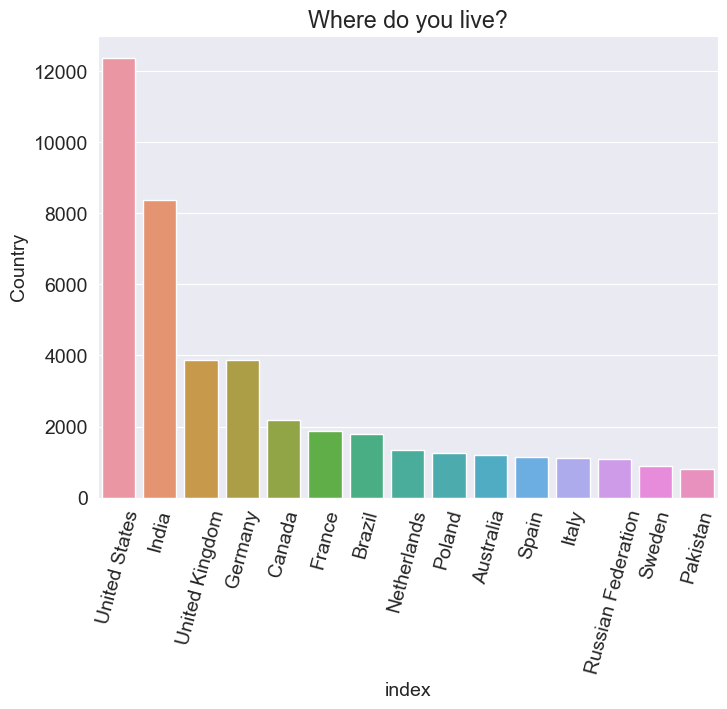

In [38]:
plt.figure(figsize = (8,6))
plt.xticks(rotation = 75)
plt.title(schema.Country)
sns.barplot(data=top_countries.reset_index(), x='index', y='Country')

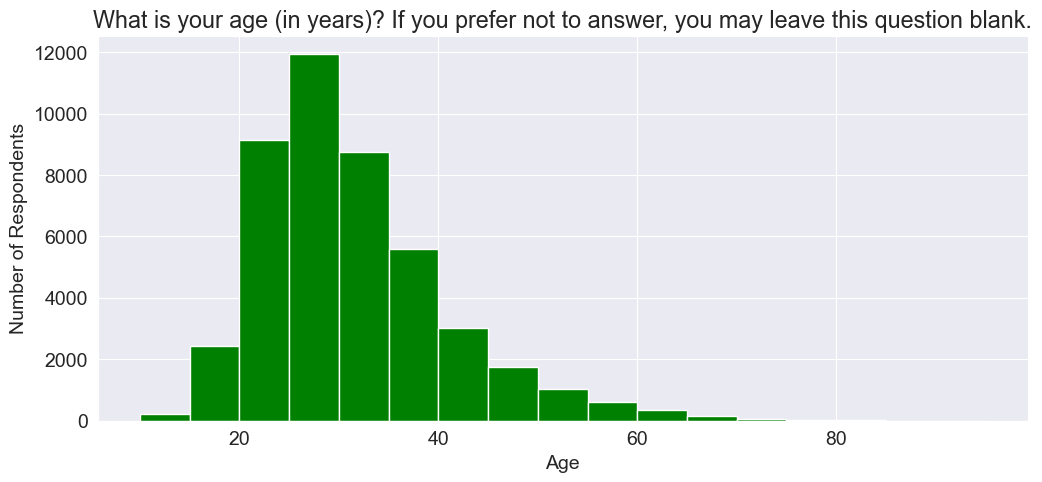

In [39]:
plt.figure(figsize = (12,5))
plt.hist(survey_df.Age,
        bins = np.arange(10,100,5),
        color = 'green')
plt.title(schema.Age)
plt.xlabel('Age')
plt.ylabel('Number of Respondents')

plt.show()

In [40]:
gender_counts = survey_df.Gender.value_counts(dropna = False)

In [41]:
gender_counts

Man                                                  45895
NaN                                                  14191
Woman                                                 3835
Non-binary, genderqueer, or gender non-conforming      385
Name: Gender, dtype: int64

Text(0.5, 1.0, 'Which of the following describe you, if any? Please check all that apply. If you prefer not to answer, you may leave this question blank.')

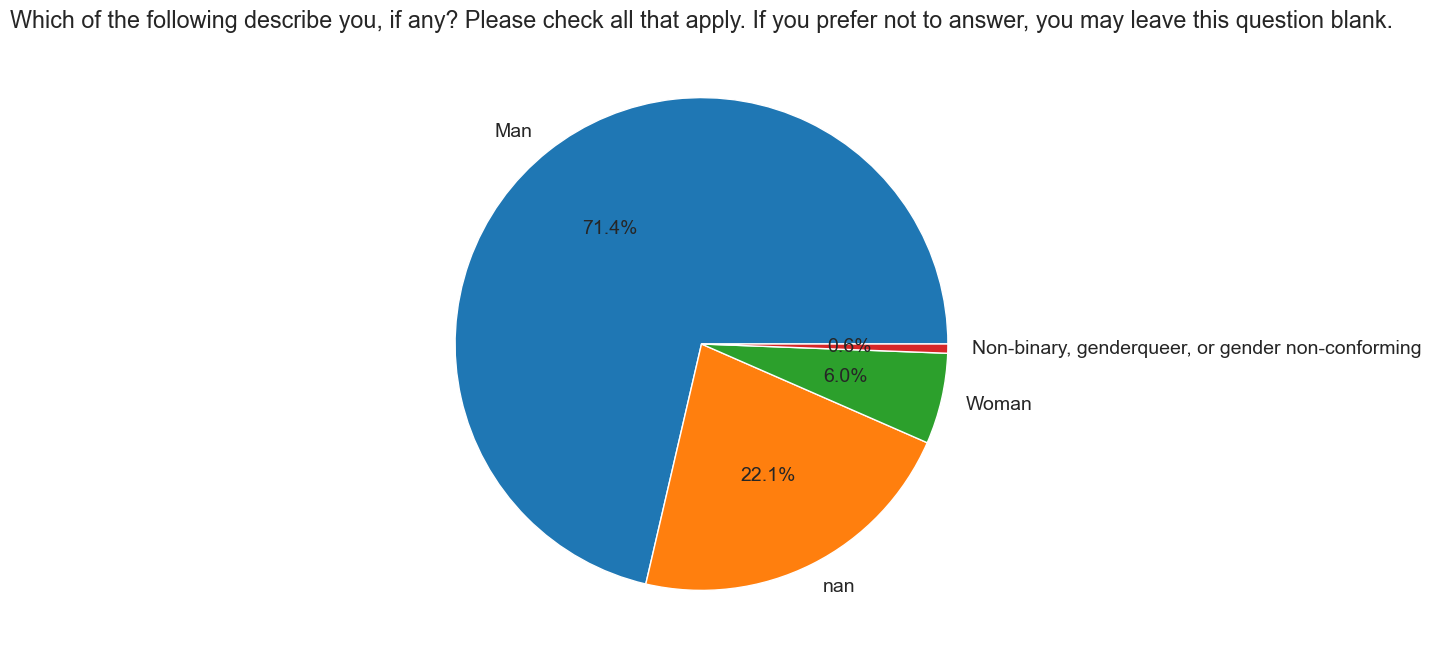

In [42]:
plt.figure(figsize = (15,8))
plt.pie(gender_counts,
       labels = gender_counts.index,
       autopct = '%1.1f%%')
plt.title(schema.Gender)

Text(0, 0.5, '')

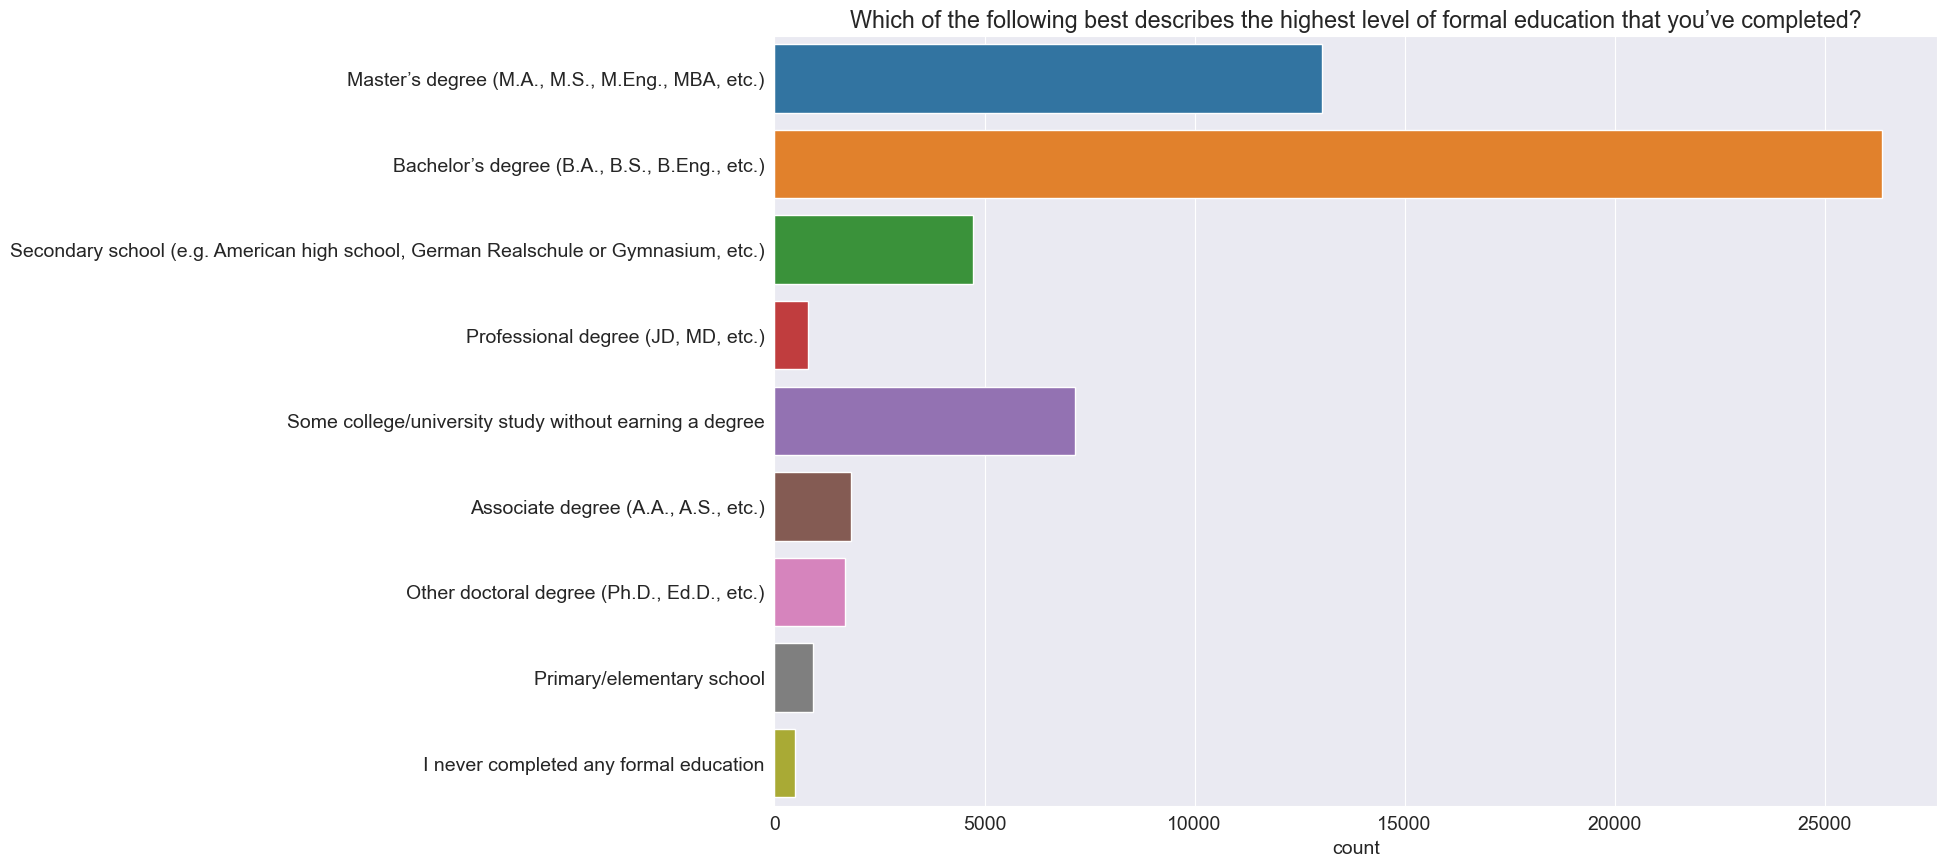

In [43]:
plt.figure(figsize = (15,10))
sns.countplot(y = survey_df.EdLevel)
plt.title(schema.EdLevel)
plt.ylabel(None)

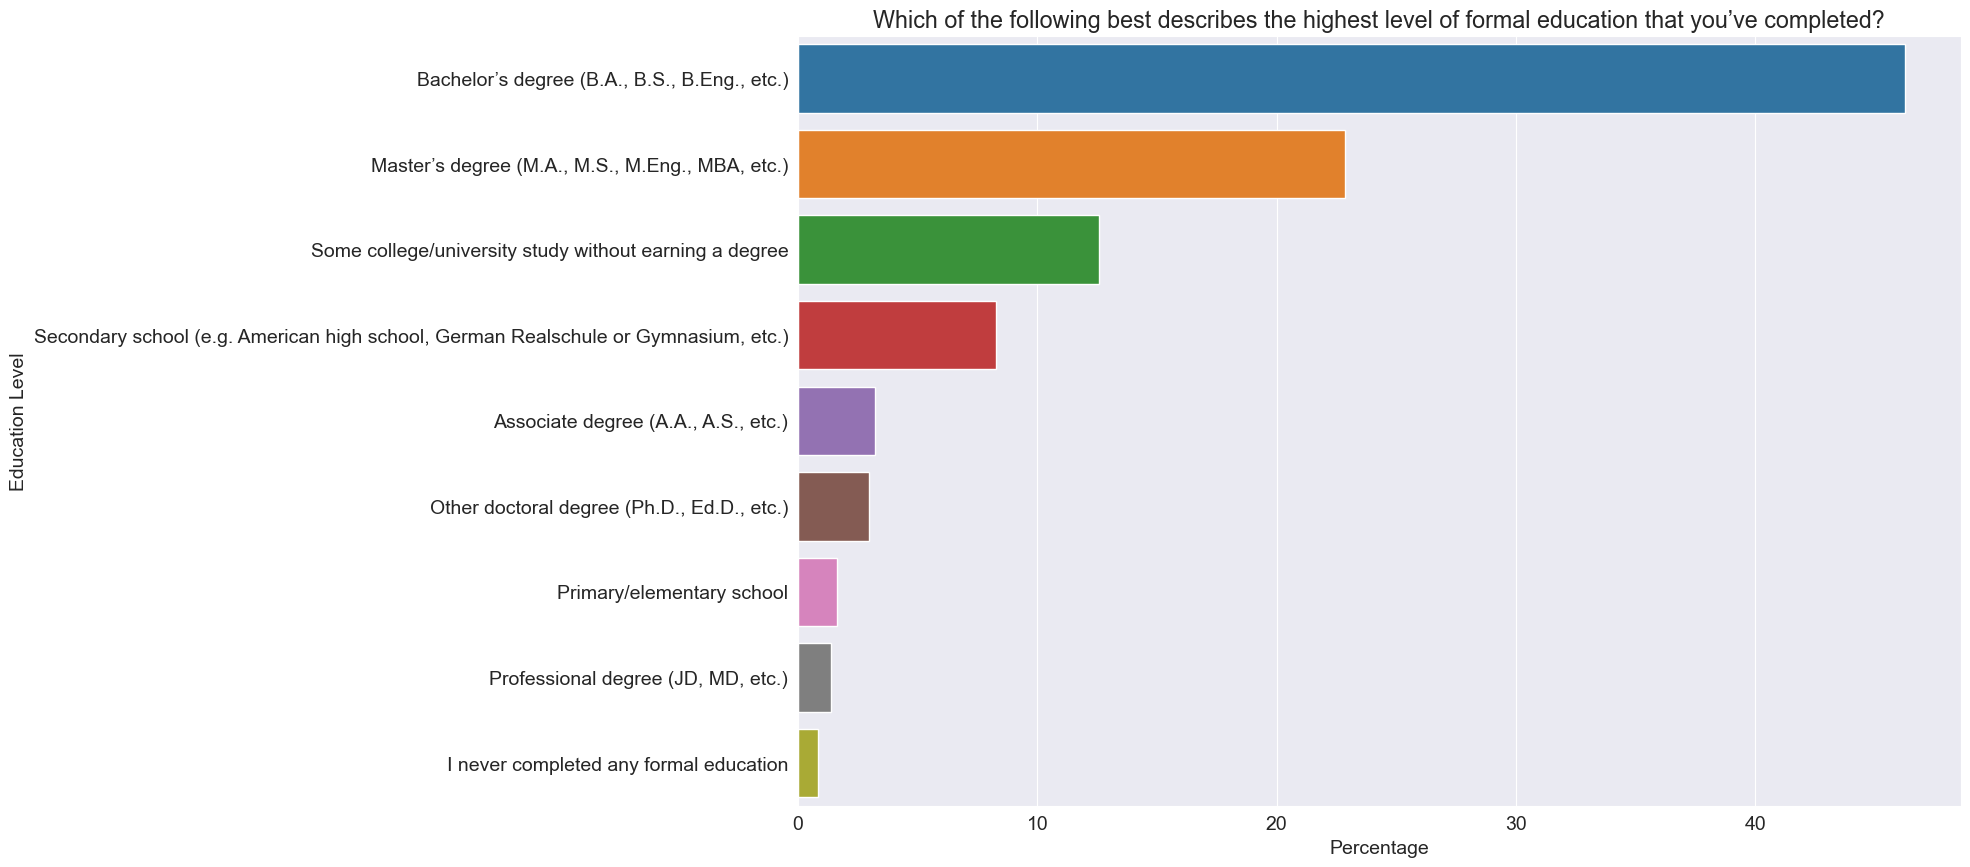

In [44]:

# Calculate the percentages for each category in the "EdLevel" column
percentage_counts = (survey_df['EdLevel'].value_counts() * 100/ survey_df['EdLevel'].count())

# Create a bar plot with percentages on the y-axis
plt.figure(figsize=(15, 10))
sns.barplot(x=percentage_counts.values, y=percentage_counts.index, orient='h')
plt.title(schema.EdLevel)
plt.xlabel('Percentage')
plt.ylabel('Education Level')
plt.show()

In [45]:
survey_df.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31353
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4735
Information systems, information technology, or system administration              4041
A natural science (such as biology, chemistry, physics, etc.)                      2185
Mathematics or statistics                                                          1836
Web development or web design                                                      1773
A business discipline (such as accounting, finance, marketing, etc.)               1367
A humanities discipline (such as literature, history, philosophy, etc.)             997
A social science (such as anthropology, psychology, political science, etc.)        922
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      715
I never declared a major                                                            448
A health science (such as nursin

In [46]:
#for getting percentage of every major 
survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count()

Computer science, computer engineering, or software engineering                   61.939193
Another engineering discipline (such as civil, electrical, mechanical, etc.)       9.354195
Information systems, information technology, or system administration              7.983168
A natural science (such as biology, chemistry, physics, etc.)                      4.316561
Mathematics or statistics                                                          3.627097
Web development or web design                                                      3.502637
A business discipline (such as accounting, finance, marketing, etc.)               2.700567
A humanities discipline (such as literature, history, philosophy, etc.)            1.969616
A social science (such as anthropology, psychology, political science, etc.)       1.821450
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     1.412513
I never declared a major                                                        

Text(0, 0.5, '')

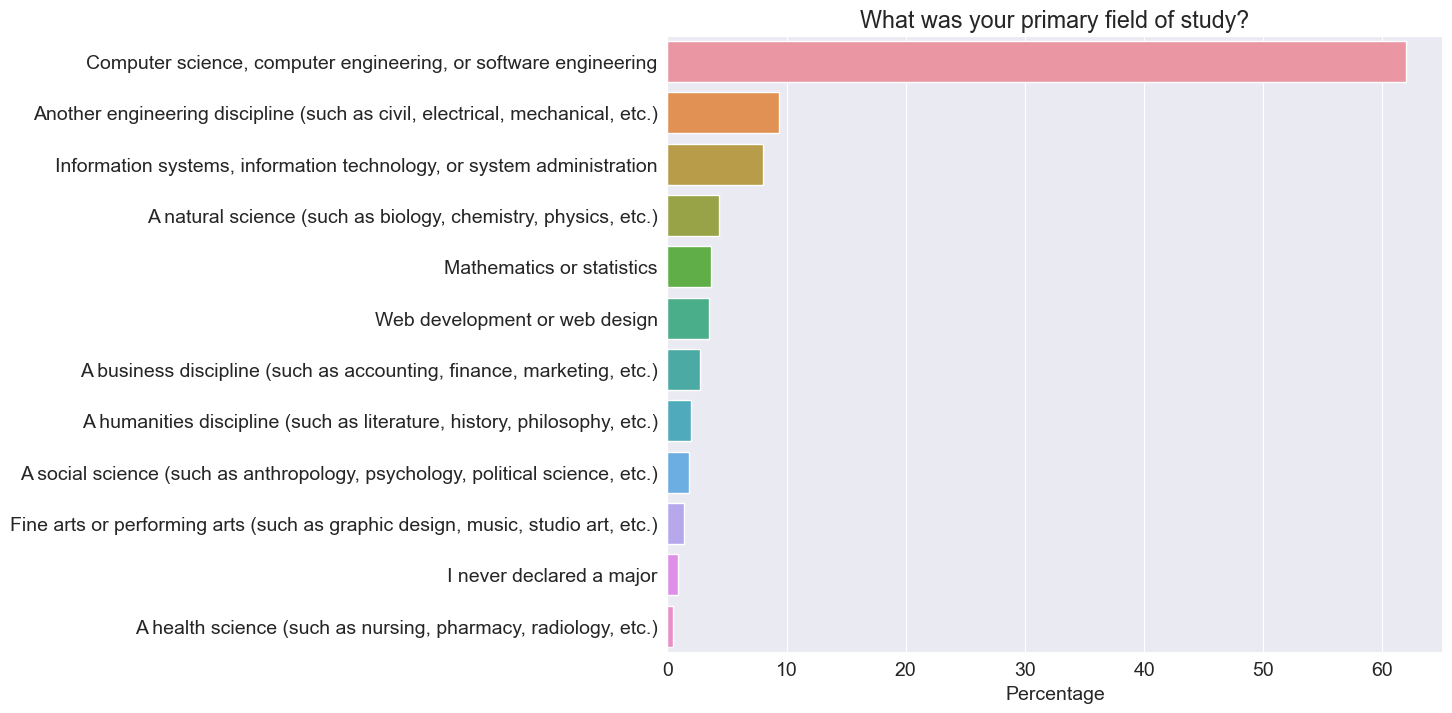

In [47]:
undergrad_pct = (survey_df.UndergradMajor.value_counts()*100/survey_df.UndergradMajor.count())
plt.figure(figsize = (10,8))
sns.barplot(x = undergrad_pct, y = undergrad_pct.index)
plt.title(schema.UndergradMajor)
plt.xlabel("Percentage")
plt.ylabel(None)

Text(0, 0.5, '')

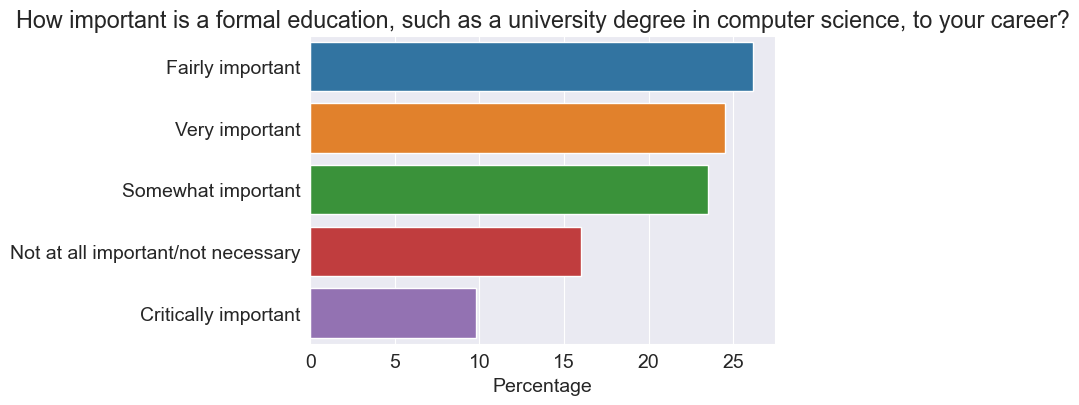

In [48]:
newedimpt_pct = (survey_df.NEWEdImpt.value_counts()*100/survey_df.NEWEdImpt.count())
plt.figure(figsize = (6,4))
sns.barplot(x = newedimpt_pct , y = newedimpt_pct.index)
plt.title(schema.NEWEdImpt)
plt.xlabel("Percentage")
plt.ylabel(None)

In [49]:
schema.Employment

'Which of the following best describes your current employment status?'

Text(0.5, 0, 'Percentage')

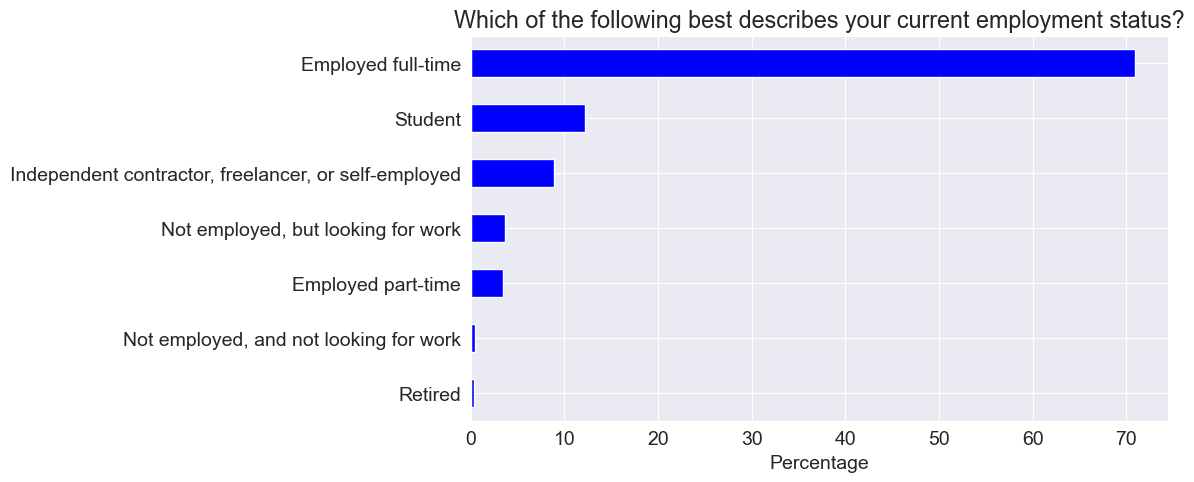

In [50]:
(survey_df.Employment.value_counts(normalize=True, ascending=True)*100).plot(kind = 'barh',color = 'blue')
plt.title(schema.Employment)
plt.xlabel("Percentage")

In [51]:
survey_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                           4396
Developer, back-end                                                                                                                                                             3056
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                  2214
Developer, back-end;Developer, full-stack                                                                                                                                       1465
Developer, front-end                                                                                                                                                            1390
                                                                                               

In [52]:
def split_multicolumn(col_series):
    result_df = col_series.to_frame()
    options = set()  # Use a set to store unique options
    for idx, value in col_series[col_series.notnull()].items():
        for option in value.split(';'):
            options.add(option)  # Use add() to add unique options to the set
            result_df.at[idx, option] = True
            
    # Convert the set of options to a list for DataFrame column ordering
    options_list = list(options)
    result_df = result_df[options_list].fillna(False)
    return result_df[options_list]  # Return the DataFrame with ordered columns

 

In [53]:
dev_type_df = split_multicolumn(survey_df.DevType)

In [54]:
dev_type_df

,"Developer, QA or test",DevOps specialist,Senior executive/VP,"Engineer, site reliability","Developer, game or graphics","Developer, full-stack",Product manager,"Developer, front-end",Scientist,System administrator,...,Engineering manager,Database administrator,Data scientist or machine learning specialist,"Developer, embedded applications or devices",Academic researcher,Designer,"Developer, back-end","Developer, desktop or enterprise applications","Developer, mobile",Educator
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
dev_type_total = dev_type_df.sum().sort_values(ascending=False)

In [56]:
dev_type_total

Developer, back-end                              26996
Developer, full-stack                            26915
Developer, front-end                             18128
Developer, desktop or enterprise applications    11687
Developer, mobile                                 9406
DevOps specialist                                 5915
Database administrator                            5658
Designer                                          5262
System administrator                              5185
Developer, embedded applications or devices       4701
Data or business analyst                          3970
Data scientist or machine learning specialist     3939
Developer, QA or test                             3893
Engineer, data                                    3700
Academic researcher                               3502
Educator                                          2895
Developer, game or graphics                       2751
Engineering manager                               2699
Product ma

In [57]:
schema.JobSat

'How satisfied are you with your current job? (If you work multiple jobs, answer for the one you spend the most hours on.)'

In [58]:
survey_df.JobSat.unique()

array(['Slightly satisfied', 'Very dissatisfied', nan,
       'Slightly dissatisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied'], dtype=object)

Text(0, 0.5, '')

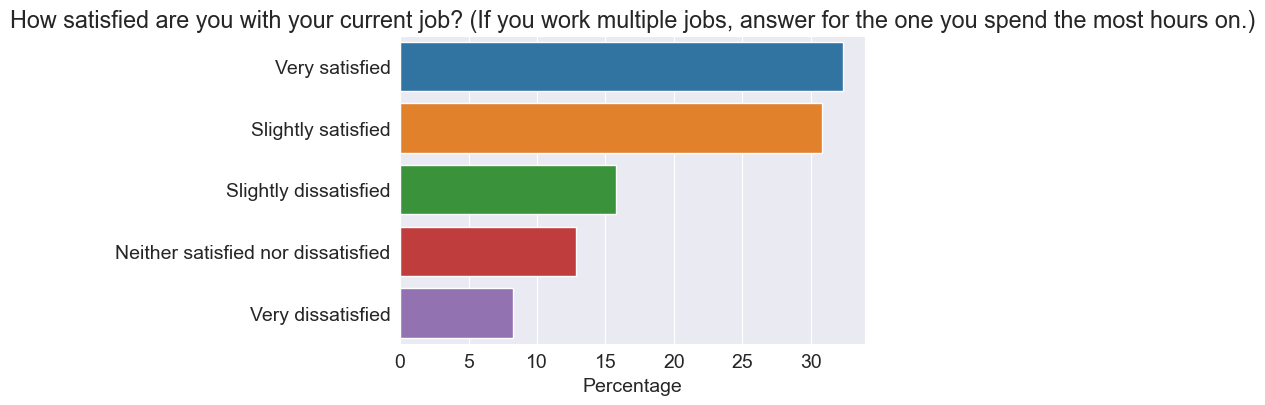

In [59]:
jobsat_pct = (survey_df.JobSat.value_counts()*100/survey_df.JobSat.count())
plt.figure(figsize = (6,4))
sns.barplot(x = jobsat_pct , y = jobsat_pct.index)
plt.title(schema.JobSat)
plt.xlabel("Percentage")
plt.ylabel(None)

In [60]:
schema.LanguageWorkedWith

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [61]:
schema.LanguageDesireNextYear

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

In [62]:
survey_df.LanguageWorkedWith

0                                   C#;HTML/CSS;JavaScript
1                                         JavaScript;Swift
2                                 Objective-C;Python;Swift
3                                                      NaN
4                                        HTML/CSS;Ruby;SQL
                               ...                        
64456                                                  NaN
64457    Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...
64458                                                  NaN
64459                                             HTML/CSS
64460                      C#;HTML/CSS;Java;JavaScript;SQL
Name: LanguageWorkedWith, Length: 64306, dtype: object

In [63]:
language_workwith_df = split_multicolumn(survey_df.LanguageWorkedWith)

In [64]:
language_workwith_df

,SQL,HTML/CSS,Rust,Perl,Java,Swift,JavaScript,R,Dart,Haskell,...,Kotlin,Python,Bash/Shell/PowerShell,Scala,Objective-C,Assembly,PHP,C#,Go,VBA
0,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,...,False,True,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64457,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
64458,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
64459,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [65]:
language_workwith_pct = language_workwith_df.mean().sort_values(ascending = False)*100
language_workwith_pct

JavaScript               59.893323
HTML/CSS                 55.801947
SQL                      48.444935
Python                   39.001026
Java                     35.618760
Bash/Shell/PowerShell    29.239884
C#                       27.803004
PHP                      23.130035
TypeScript               22.461357
C++                      21.114670
C                        19.236152
Go                        7.758219
Kotlin                    6.887382
Ruby                      6.229590
Assembly                  5.447392
VBA                       5.394520
Swift                     5.226573
R                         5.064846
Rust                      4.498803
Objective-C               3.603085
Dart                      3.517557
Scala                     3.150561
Perl                      2.757130
Haskell                   1.861413
Julia                     0.782198
dtype: float64

Text(0.5, 0, 'count')

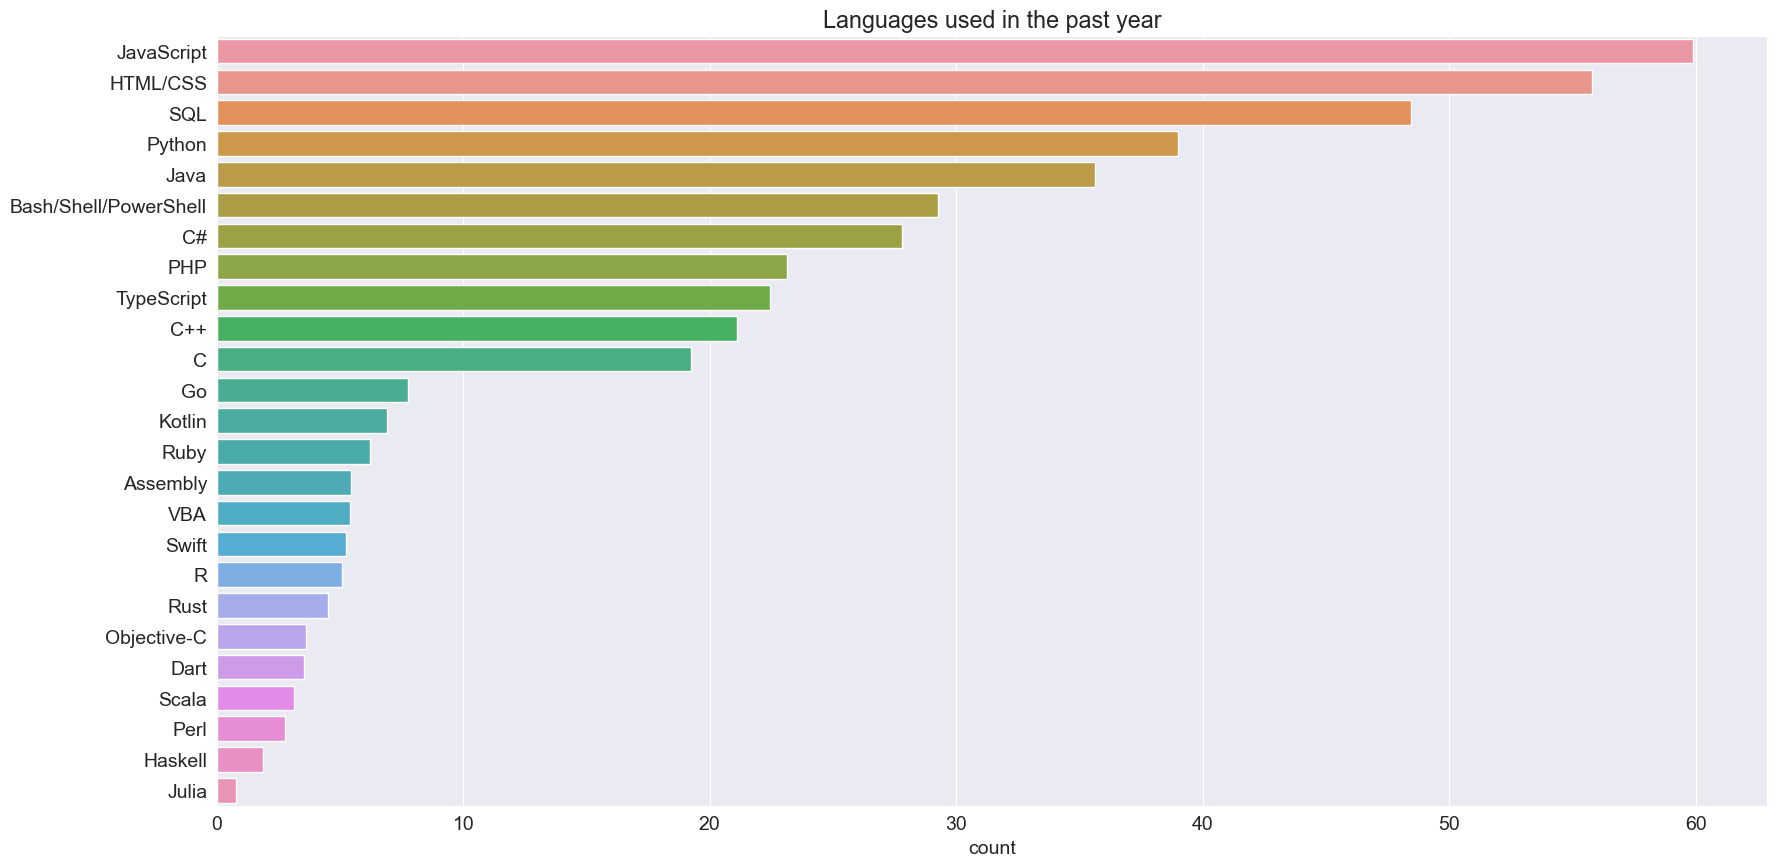

In [66]:
plt.figure(figsize = (20,10))
sns.barplot(x = language_workwith_pct,
            y = language_workwith_pct.index)
plt.title("Languages used in the past year")
plt.xlabel("count")

In [67]:
countries_df = survey_df.groupby("Country")[['WorkWeekHrs']].mean().sort_values(['WorkWeekHrs'],ascending = False)

In [68]:
countries_df

,WorkWeekHrs
Country,
Kuwait,58.222222
Iraq,52.153846
Grenada,50.000000
Maldives,47.300000
Afghanistan,46.500000
...,...
North Korea,NaN
Saint Lucia,NaN
Sierra Leone,NaN


In [69]:
high_response_countries_df = countries_df.loc[survey_df.Country.value_counts()> 250].head(20)

In [70]:
high_response_countries_df

,WorkWeekHrs
Country,
Iran,44.337748
Israel,43.915094
China,42.150000
United States,41.802982
Greece,41.402724
Viet Nam,41.391667
South Africa,41.023460
Turkey,40.982143
Sri Lanka,40.612245


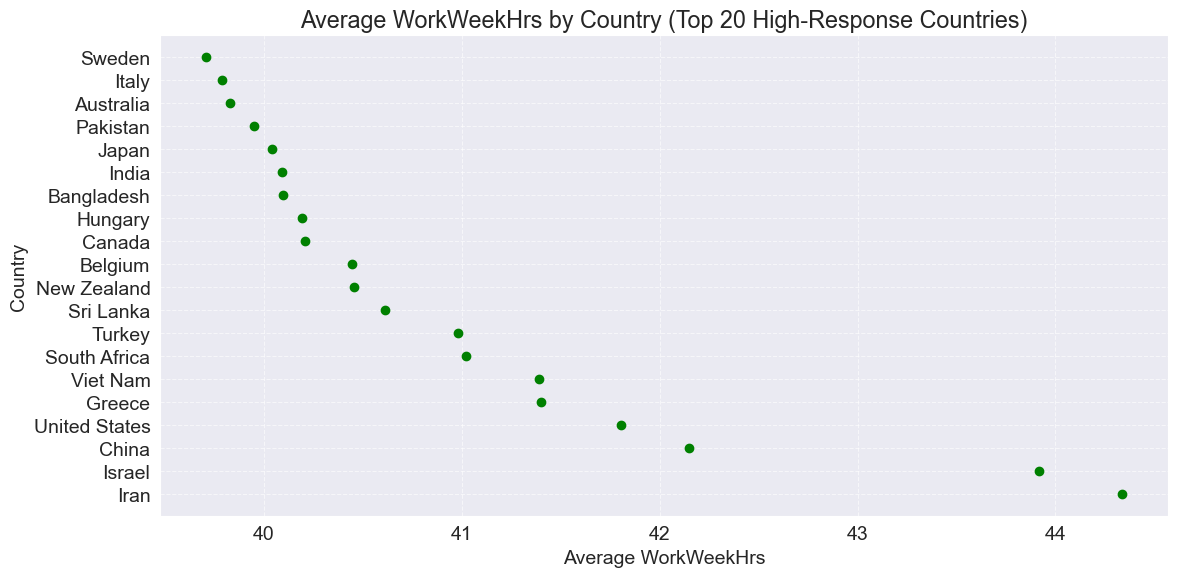

In [71]:
countries = high_response_countries_df.index
work_week_hrs = high_response_countries_df['WorkWeekHrs']

plt.figure(figsize=(12, 6))
plt.scatter(work_week_hrs, countries, color='green', marker='o')
plt.xlabel('Average WorkWeekHrs')
plt.ylabel('Country')
plt.title('Average WorkWeekHrs by Country (Top 20 High-Response Countries)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()
